### Fit the following datasets to the following curves and obtain best fit parameters. Plot the data next to each curve fit.
#### curvefit_dataset1.csv to $axe^{-bx}$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

df0=pd.read_csv('data/curvefit_dataset1.csv')
df0

x_0_data=df0.x.values
y_0_data=df0.y.values
yerr_0_data=np.abs(df0.yerr.values)

def curve_axe(x, a, b):
    return a*x*np.exp(-b*x)

params,covairance=curve_fit(curve_axe,x_0_data,y_0_data,sigma=yerr_0_data)

print(f'The parameters are{params}')

x_0_model=np.linspace(min(x_0_data),max(x_0_data),1000)
y_0_model=curve_axe(x_0_model,*params)

The parameters are[3.97597145 1.97870269]


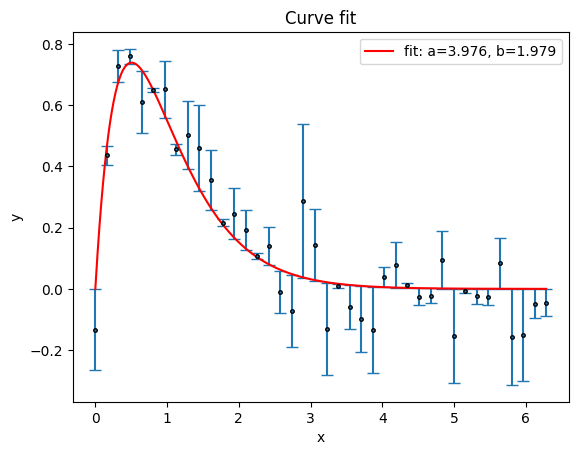

In [26]:
plt.errorbar(x_0_data,y_0_data, yerr_0_data,  ls='', capsize=4, marker='.', ms=5, mec='black')
plt.plot(x_0_model,y_0_model,label='fit: a=%5.3f, b=%5.3f' % tuple(params),color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve fit')
plt.show()

#### curvefit_dataset2.csv to $ae^{-b \sqrt x} + ce^{-d \sqrt x}$

In [27]:
df1=pd.read_csv('data/curvefit_dataset2.csv')

x_1_data=df1.x.values
y_1_data=df1.y.values
yerr_1_data=np.abs(df1.yerr.values)

def curve_ae(x,a,b,c,d):
    return a*np.exp(-b*np.sqrt(x))+c*np.exp(-d*np.sqrt(x))

params1,covarience1=curve_fit(curve_ae,x_1_data,y_1_data,sigma=yerr_1_data)
print(f'The parameters are{params1}')

x_1_model=np.linspace(min(x_1_data),max(x_1_data),1000)
y_1_model=curve_ae(x_1_model,*params1)

The parameters are[ 9.02300756  1.65786311 -0.84204895  1.65786366]


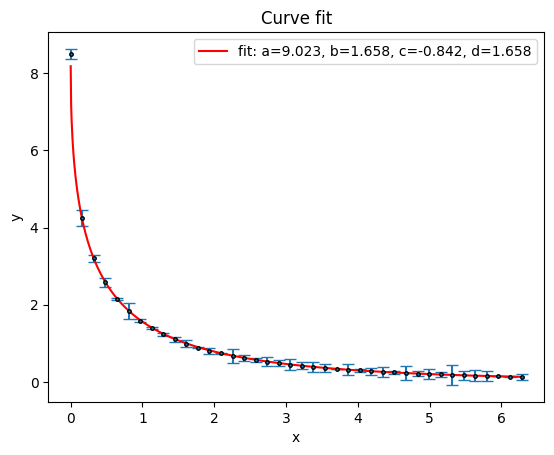

In [28]:
plt.errorbar(x_1_data,y_1_data,yerr_1_data,ls='',capsize=4,marker='.',ms=5,mec='black')
plt.plot(x_1_model,y_1_model,label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f' % tuple(params1),color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve fit')
plt.show()

#### curvefit_dataset3.csv to $ Asin(\omega x+\phi) $

In [29]:
df2=pd.read_csv('data/curvefit_dataset3.csv')

x_2_data=df2.x.values
y_2_data=df2.y.values
yerr_2_data=np.abs(df2.yerr.values)

def curve_asin(x,a,w,b):
    return a*np.sin(w*x+b)

params2,covarience2=curve_fit(curve_asin,x_2_data,y_2_data,sigma=yerr_2_data,p0=[3, 8, np.pi/2])
perr=np.sqrt(np.diag(covarience2))

print(f'The parameters are{params2}')

x_2_model=np.linspace(min(x_2_data),max(x_2_data),1000)
y_2_model=curve_asin(x_2_model,*params2)

The parameters are[2.99966676 7.99985911 1.57076656]


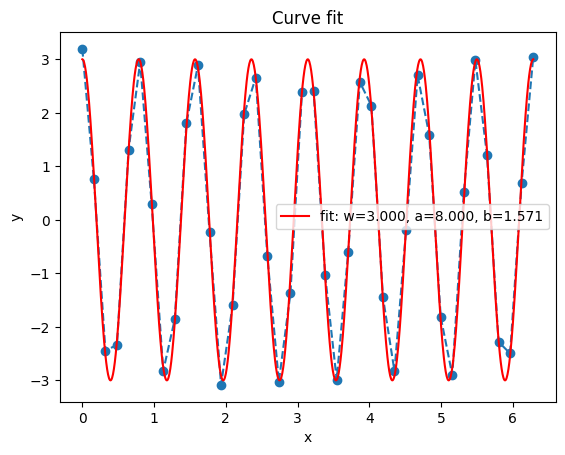

In [30]:
# plt.errorbar(x_2_data,y_2_data,yerr_2_data,ls='',capsize=4,marker='.',ms=5,mec='black')
plt.plot(x_2_data,y_2_data,'o--')
plt.plot(x_2_model,y_2_model,label='fit: w=%5.3f, a=%5.3f, b=%5.3f' % tuple(params2),color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve fit')
plt.show()

### Open the data files co60.csv, cs137.csv, and na22.csv.These files contain data similar to the Example 2 in the Curve_Fitting_Examples.ipynb file. Each represents count data from a separate radioactive substance: cobalt 60 (used in old radiotherapy units), Cesium 137, and Sodium22

####  Plot the number of counts vs. the channel number for all three substances on the same plot.

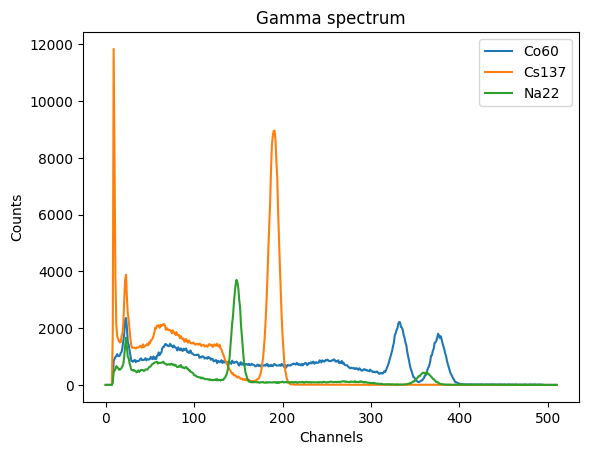

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

df_co=pd.read_csv('data/co60.csv')
df_cs=pd.read_csv('data/cs137.csv')
df_na=pd.read_csv('data/na22.csv')

co_data=df_co.values
cs_data=df_cs.values
na_data=df_na.values
channel=np.arange(len(co_data))

plt.plot(channel,co_data,label='Co60')
plt.plot(channel,cs_data,label='Cs137')
plt.plot(channel,na_data,label='Na22')
plt.legend()
plt.xlabel('Channels')
plt.ylabel('Counts')
plt.title('Gamma spectrum')
plt.show()


 #### (Look only at channel numbers beyond 100). You will notice that cs137 has one bump, while na22 and co60 have two bumps. Fit these 5 bumps to a Gaussian curve, finding µ and σ for each. Use the fact that the error on the number of counts N is $\sqrt N$ when fitting.

#### It is known that Cobalt has emission energies 1.173MeV and 1.332MeV, Cesium has an emission energy of 0.6617MeV. and sodium has emission energies 0.511MeV and 1.275MeV. Match each of these energies E with µ from Part B, and plot µ vs. E. Then fit this data to a line $ µ = aE + b $ (using the fact that the error for µ is the fit error:popt)

#### The fit $ µ = aE + b $ allows one to convert between units of channel number and units of energy. Convert the σ and µ from Part B to units of energy, and then plot σ vs. µ

####  By interpolating the data from Part D, find the detector resolution (i.e. σ) in units of energy at an incoming photon energy of 1MeV